In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Type of Numbers
### Integers
The only issue is __overflow__, and the issue with division (Euclidean division or floating depends on algorithms)

### floating-point numbers
Often approximates reals

#### Representation of floating numbers
$\pm d_1.d_2d_3d_4...d_p \times \beta^n \equiv $ [significant/fraction part/mantissa] $\times$ [exponent] where  
$\beta$: base,  
$p$: procession,  
$0\leq d_i < \beta$  
If normalized, $d_1 \neq 0$  
$L \leq n \leq U$

__Underflow limit (UFL)__ the smallest positive number before getting a underflow is $1.00..0 \times \beta^L$
__Overflow limit (OFL)__ the largest positive number before getting an overflow is $[\beta-1].[\beta-1]...[\beta-1] \times \beta^U = (\beta - \beta^{1-p})\times \beta^U = (1-\beta^{-p})\beta^{U+1}$.

#### IEEE Floating Point Standard

|   | p |L   |U  | decimal numbers | exponent range in base 10|
|--- |---| ---|---| --- | --- |
|single precision | 24 | -126 | 127 | 6-7 | -37 ~ +37 | 
|double precision | 53 | -1022 | 1023 |16 | -308 ~ +308 | |

#### Rounding
Most of the time, we can round to the nearest, while when the rounding is exactly at the middle, round to the nearest even least-significant-digit (__round to even__). In binary, such case will always round to 0 (as 0 is "even")

IEEE has 4 rounding modes, but we will only encounter rounding to the nearest. 

__Example__ Consider 3 decimal digit numbers, i.e. $(p = 3, \beta = 10)$, assume $L,U = [-10, 10]$. Then 
$$1.54\times 10^1 + 2.56\times 10^{-1} = 15.4 + 0.256 = 15.656 \rightarrow 1.57 \times 10^1$$

#### Distance between two adjacent floating number => Machine epsilon $\epsilon_{mach}$
The distance from 1 to the next bigger floating-point number will be $1.00...0 \times \beta^0$, the next number will be $1.00...01\times \beta^0$, $d=\beta^{1-p}=:\epsilon_{mach}$, which is the machine epsilon. 

For each adjacent pair of numbers $a, b$ in $[\beta^i, \beta_{i+1}), d(a, b) = \beta^i \epsilon_{mach}$, a.k.a. numbers are evenly spread with tte distance apart $=\beta^i \epsilon_{mach}$

For some real number $a$, considering the rounding to the nearest floating point number, the absolute error $fp(a)$, $|fl(a) - a| \leq \frac{\beta^i\epsilon_{mach}}{2}$ and the relative error $\frac{|fp(a)-a|}{|a|}\leq \frac{\beta^i\epsilon_{mach}}{2\beta^i} = \epsilon_{mach}/2$

#### IEEE Rule of operations
IEEE has 5 __Basic operations__: $+,-,\times, /, \sqrt{x} $ and guarantees that  

$fl(a \: op\: b):=$ the floating point number closest to $a\: op\:b$, assuming using rounding to nearest mode and not exceeding UFL or OFL

$\Rightarrow |\frac{fl(a\: op\: b) - (a\: op\: b)}{a\: op\: b}| \leq \frac{\epsilon_{mach}}{2}$

If encounters UFL or OFL, this property may not be guaranteed  
$$fl(2.02\times 10^{-16}\times 1.11\times 10^{-6}) \rightarrow 0.02\times 10^{-10}$$ 
$$\frac{|2.00\times 10^{-12} - 2.2422\times 10^{-12}|}{2.2422\times 10^{-12}} \approx 0.108 > \frac{1}{2}10^{-2}=\epsilon_{mach}/2$$

#### Problems with $\geq 2$ numbers 
Consider $fl(1.00\times 10^3 + 1.00\times 10^7 - 1.00\times 10^7)$, for exact arithmetic the result will be $1.0001\times 10^7$, 
while if we do the calculate in the left-right order $fl(*) = fl(1.00\times 10^7 - 1.00\times 10^7) = 0$  
if we do the subtraction first, the result will be $fl(1.00\times 10^3 + 0) = 1.00\times 10^3$

__Catastrophic cancellation__ If you compute a sum and some of the intermediate values are much larger in magnitude than the final result, then the relative error in the computed sum may be very large. (Consider the example given, $\frac{|0 - T|}{T} = 1\Rightarrow $ no accuracy at all)

Consider $fl((a*b)*c)$, assuming no OFL/UFL, since $fl(a*b) = (a*b)(1+\delta), |\delta| \leq \epsilon_{mach}/2$. Then, 
$$\begin{align}
fl(a*b*c) &= fl((a*b)(1+\delta)*c) \\
&= [(ab)(1+\delta_1)]c(1+\delta_2)\\
&= (abc)(1+\delta_1+\delta_2 + \delta_1\delta_2)\\
&\leq (abc)(1+\epsilon_{mach} + \epsilon^2_{mach}/4)\\
\frac{fl(a*b*c) - abc}{abc}&= \epsilon + \epsilon^2/4
\end{align}$$
Therefore, multiplications often have fewer errors

Suppose $a,b,c\geq 0$ (also works on $a,b,c\leq 0$), assume no OFL/UFL  
$$\begin{align}
fl(a+b+c) &= fl((a+b)(1+\delta)+c)\\
&= ((a+b)(1+\delta_1) + c)(1+\delta_2)\\
&= ((a+b+c)(1+\hat\delta_1))(1+\delta_2)&\text{take }\hat\delta_1 *\\
&= (a+b+c)(1+\hat\delta_1)(1+\delta_2)\\
&= (a+b+c)(1+\tilde \delta)
\end{align}$$

__Claim__ $*\: |\hat\delta_1|\leq \epsilon/2$  
$$\begin{align*}(a+b)(1+\delta_1)+c &\leq (a+b)(1+\epsilon/2) + c&a,b,c\geq 0\\
&\leq (a+b+c)(1+\epsilon/2)\\
(a+b)(1-\delta_1)+c&\geq (a+b)(1-\epsilon/2)+c \\&\geq (a+b+c)(1-\epsilon/2)
\end{align*}$$

__Note__ $a,b,c$ must have the __same sign__ to make this true

#### Computing infinite sum
$$fl(\sum^\infty n^{-1}) = fl(\sum^N \frac{1}{n} + \frac{1}{N+1})$$
However, $\frac{1}{N+1}$ will cause a UFL, hence $fl(*)$ gives a finite result instead of $\infty$  

__Example__ $\beta = 10, p =3, L= -10, U = 10$  
IEEE guarantees that we can always get the exact value, then do the rounding
$$fl(3.67\times 10 + 4.56 \times 10^2) = fl(36.7 + 456) = fl(492.7) = 4.93\times 10^2$$
Could have underflow
$$fl(2.02\times 10^{-6} \times 1.01\times 10^{-5}) = fl(2.0402\times 10^{-11})=UFL$$

#### Subnormal (denormal) numbers and Gradual Underflow
Subnormal numbers have $d_1 = 0$.  
Benefit: We filled in the gap between $[0, \beta^L)$  
Penalty: The machine epsilon number rule does not hold, i.e. $\exists a. |fl(a)-a|/|a| > \epsilon_{mach}/2$

__Example__ with $\beta = 10, p = 3, L = -10, U = 10$  

$$\begin{align}
1.01 \times 10^{-5} \cdot 2.02 \times 10^{-6} &= 2.0402 \times 10^{-11}\\
&= 0.20402\times 10^{-10} &\text{using subnormal}\\
&\rightarrow 0.20\times 10^{-10} &\text{still need leading 0 to tell this is subnormal} \\
1.01 \times 10^{-6} \cdot 2.02 \times 10^{-7} &= 2.0402 \times 10^{-13}\\
&= 0.0020402\times 10^{-10} \\
&\rightarrow 0.00\times 10^{-10} &\text{underflow}\\
&\rightarrow 0
\end{align}$$
The second case will be the underflow to a subnormal number

$$\begin{align}
3.56 \times 10^6 \cdot 5.41 \times 10^6 &= 1.92596 \times 10^{11}\\
&\rightarrow +Inf &\text{overflow happens}
\end{align}$$

#### Inf and NaN
When overflow happens, IEEE rules it as $\pm Inf$ (it just means greater than the computer's capacity, not actually infinity)  
$Inf  + Inf\rightarrow +Inf, Inf-Inf\rightarrow NaN, Inf/Inf \rightarrow NaN, 0/0\rightarrow NaN$ `NaN` better understands as I don't know what it is

## Examples 

Is $y=\sqrt{1+x^2} - 1=:f(x)$ well-conditioned?  
$$\begin{align}
C.N &= \frac{xf'(x)}{f(x)}\\
&= \frac{x(x(1+x^2)^{-1/2}}{(1+x^2)^{1/2}-1}\\
&= \frac{x(x(1+x^2)^{-1/2}}{(1+x^2)^{1/2}-1} \frac{\sqrt{1+x^2}+1}{\sqrt{1+x^2}+1}\\
&= \frac{x^2\sqrt{1+x^2}+1}{\sqrt{1+x^2}(1+x^2-1)}\\
&= \frac{\sqrt{1+x^2} + 1}{\sqrt{1+x^2}}\\
C.N. &\in [1,2]
\end{align}$$

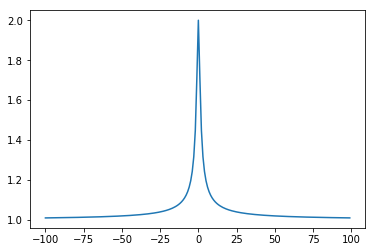

In [13]:
a = np.arange(-100, 100, 1)
b = ((a ** 2 + 1) ** 0.5 + 1) / ((a ** 2 + 1) ** 0.5)
plt.plot(a, b);

Does $fl(\sqrt{1+x^2}-1)$ always give an accurate result

When $x$ is small enough so that $fl(\sqrt{1+x^2}) = 1$, then $\hat y = 0, y \neq 0\Rightarrow \frac{\hat y - y}{y}=\infty$  
$fl(\sqrt{1+x^2})=1\Rightarrow x^2 < \frac{\epsilon}{2}\Rightarrow |x|\leq \sqrt{\epsilon/2}$  

When $|x|\leq \sqrt{\epsilon/2}, x\neq 0$, this operation gives an inaccurate result, and for moderately small $x$ this is still not so accurate

Can we change $\sqrt{1+x^2}-1$ to a mathematically equivalent that has a much smaller f.p. error. 
$$(*)=\sqrt{1+x^2}-1\frac{\sqrt{1+x^2}+1}{\sqrt{1+x^2}+1}= \frac{x^2}{\sqrt{1+x^2}+1}$$

__lemma 1__ $\sqrt{1+\delta} = 1+\hat \delta, |\hat\delta| < \epsilon/2$  
__lemma 2__ $(1+\delta)^{-1} = 1+\hat\delta, |\hat\delta| < \frac{1.01\epsilon}{2}$

__Claim__ accuracy   
$$\begin{align}
fl\bigg(\frac{x^2}{\sqrt{1+x^2}+1}\bigg) &= (1+\delta_5)\bigg(\frac{x^2(1+\delta_1)}{(\sqrt{(1+x^2(1+\delta_1))(1+\delta_2)}(1+\delta_3)+1)(1+\delta_4)}\bigg)\\
&= \frac{(1+\delta_5)x^2(1+\delta_1)}{[\sqrt{(1+x^2)(1+\hat\delta_1)(1+\delta_2)}(1+\delta_3)+1](1+\delta_4)}\\
&= \frac{(1+\delta_5)x^2(1+\delta_1)}{[\sqrt{(1+x^2)}\sqrt{(1+\hat\delta_1)}\sqrt{(1+\delta_2)}(1+\delta_3)+1](1+\delta_4)}\\
&= \frac{(1+\delta_5)x^2(1+\delta_1)}{[\sqrt{(1+x^2)}(1+\hat\delta_1)(1+\hat\delta_2)(1+\delta_3)+1](1+\delta_4)}\\
&= \frac{(1+\delta_5)x^2(1+\delta_1)}{[\sqrt{(1+x^2)}(1+\tilde\delta_1)(1+\tilde\delta_2)(1+\delta_3)+1](1+\delta_4)}\\
&= \frac{x^2}{\sqrt{(1+x^2)}+1}\frac{(1+\delta_1)(1+\delta_5)}{(1+\delta_1^*)(1+\delta_2^*)(1+\delta_3^*)(1+\delta_4)}\\
&= \frac{x^2}{\sqrt{(1+x^2)}+1}(1+\delta_1)(1+\delta_5)(1+\delta_1^{**})(1+\delta_2^{**})(1+\delta_3^{**})(1+\delta_4^{**})
\end{align}$$
Note that $\delta^{**} \leq 1.01\epsilon/2$, let the product of all $(1+\delta)$'s, i.e. $1 + \tilde\delta \leq \frac{7(1.01)\epsilon}{2}$


$2.56248\times 10^4, 2.56125\times 10^4$ agrees to 3 sig-dig (to say agree to n sig dit, the exponent must match)
$relative. error = \frac{2.56248 - 2.56125}{2.56125} = \frac{.00123}{2.56125}=1.23/2.56125\times 10^{-3}$
$p$ sig-dig agree $\Rightarrow 10^{-p\pm 1}$ relateive error